In [1]:
import pandas as pd

df = pd.read_csv("sqf-2023-cleaned-with-features-FINAL.csv", na_values="(null)", low_memory=False)

threshold = 0.4 * len(df)

columns_to_remove = df.columns[df.isnull().sum() > threshold]

df_cleaned = df.loc[:, df.isnull().sum() <= threshold]

df_cleaned.to_csv("sqf-2023-cleaned-with-features-FINAL.csv", index=False)

# Print the results
print(f"columns removed({len(columns_to_remove)}):")
print(columns_to_remove.tolist())

print(len(df.columns))
print(len(df_cleaned.columns))
print(df_cleaned.columns.tolist())

columns removed(0):
[]
106
106
['STOP_ID', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME', 'YEAR2', 'MONTH2', 'DAY2', 'RECORD_STATUS_CODE', 'ISSUING_OFFICER_RANK', 'ISSUING_OFFICER_COMMAND_CODE', 'SUPERVISING_OFFICER_RANK', 'SUPERVISING_OFFICER_COMMAND_CODE', 'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED', 'LOCATION_IN_OUT_CODE', 'OBSERVED_DURATION_MINUTES', 'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG', 'OTHER_PERSON_STOPPED_FLAG', 'SUSPECT_ARRESTED_FLAG', 'SUMMONS_ISSUED_FLAG', 'OFFICER_IN_UNIFORM_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG', 'ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 'OTHER_CONTRABAND_FLAG', 'WEAPON_FOUND_FLAG', 'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG', 'DEMEANOR_OF_PERSON_STOPPED', 'SUSPECT_REPORTED_AGE', 'SUSPECT_HEIGHT', 'SUSPECT_WEIGHT', 'SUSPECT_BODY_BUILD_TYPE', 'SUSPECT_EYE_COLOR', 'SUSPECT_HAIR_COLOR', 'STOP_LOCATION_PRECINCT', 'STOP_LOCATION_SECTOR_CODE', 'STOP_LOCATION_FULL_ADDRESS', 'STOP_LOCATION_STREET_NAME', 'STOP_LOCATION_X', 'STOP_LOCATION_

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df_cleaned is already loaded and preprocessed

# Define features (X) and target variable (y)
X = df_cleaned[[
    'AGE_GROUP_18-30', 
    'AGE_GROUP_31-45',
    'AGE_GROUP_46-60', 
    'AGE_GROUP_60+', 
    'SUSPECT_SEX_FEMALE',
    'SUSPECT_SEX_MALE',
    'SUSPECT_RACE_DESCRIPTION_AMERICAN INDIAN/ALASKAN NATIVE',
    'SUSPECT_RACE_DESCRIPTION_ASIAN / PACIFIC ISLANDER',
    'SUSPECT_RACE_DESCRIPTION_BLACK',
    'SUSPECT_RACE_DESCRIPTION_BLACK HISPANIC',
    'SUSPECT_RACE_DESCRIPTION_MIDDLE EASTERN/SOUTHWEST ASIAN',
    'SUSPECT_RACE_DESCRIPTION_WHITE',
    'SUSPECT_RACE_DESCRIPTION_WHITE HISPANIC',
    'TIME_OF_DAY_Evening',
    'TIME_OF_DAY_Morning', 
    'TIME_OF_DAY_Night',
    'STOP_DURATION_MINUTES',
    'STOP_LOCATION_BORO_NAME_BRONX',
    'STOP_LOCATION_BORO_NAME_BROOKLYN',
    'STOP_LOCATION_BORO_NAME_MANHATTAN',
    'STOP_LOCATION_BORO_NAME_QUEENS',
    'STOP_LOCATION_BORO_NAME_STATEN ISLAND',
    'OFFICER_EXPLAINED_STOP_FLAG',
    'OFFICER_IN_UNIFORM_FLAG',
    'OTHER_PERSON_STOPPED_FLAG',
    'DEMEANOR_SCORE',
    'COMPLIANCE_SCORE',
    'SUSPECTED_CRIME_DESCRIPTION_ASSAULT',
    'SUSPECTED_CRIME_DESCRIPTION_AUTO STRIPPIG',
    'SUSPECTED_CRIME_DESCRIPTION_BURGLARY',
    'SUSPECTED_CRIME_DESCRIPTION_CPSP',
    'SUSPECTED_CRIME_DESCRIPTION_CPW',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL MISCHIEF',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL POSSESSION OF FORGED INSTRUMENT',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL SALE OF CONTROLLED SUBSTANCE',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL SALE OF MARIHUANA',
    'SUSPECTED_CRIME_DESCRIPTION_CRIMINAL TRESPASS',
    'SUSPECTED_CRIME_DESCRIPTION_FORCIBLE TOUCHING',
    'SUSPECTED_CRIME_DESCRIPTION_GRAND LARCENY',
    'SUSPECTED_CRIME_DESCRIPTION_GRAND LARCENY AUTO',
    'SUSPECTED_CRIME_DESCRIPTION_MAKING GRAFFITI',
    'SUSPECTED_CRIME_DESCRIPTION_MENACING',
    'SUSPECTED_CRIME_DESCRIPTION_MURDER',
    'SUSPECTED_CRIME_DESCRIPTION_OTHER',
    'SUSPECTED_CRIME_DESCRIPTION_PETIT LARCENY',
    'SUSPECTED_CRIME_DESCRIPTION_RAPE',
    'SUSPECTED_CRIME_DESCRIPTION_RECKLESS ENDANGERMENT',
    'SUSPECTED_CRIME_DESCRIPTION_ROBBERY',
    'SUSPECTED_CRIME_DESCRIPTION_TERRORISM',
    'SUSPECTED_CRIME_DESCRIPTION_THEFT OF SERVICES',
    'SUSPECTED_CRIME_DESCRIPTION_UNAUTHORIZED USE OF A VEHICLE'
]]
y = df_cleaned['FRISKED_AND_ARRESTED']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8515026517383618
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2890
           1       0.50      0.04      0.08       504

    accuracy                           0.85      3394
   macro avg       0.68      0.52      0.50      3394
weighted avg       0.80      0.85      0.79      3394



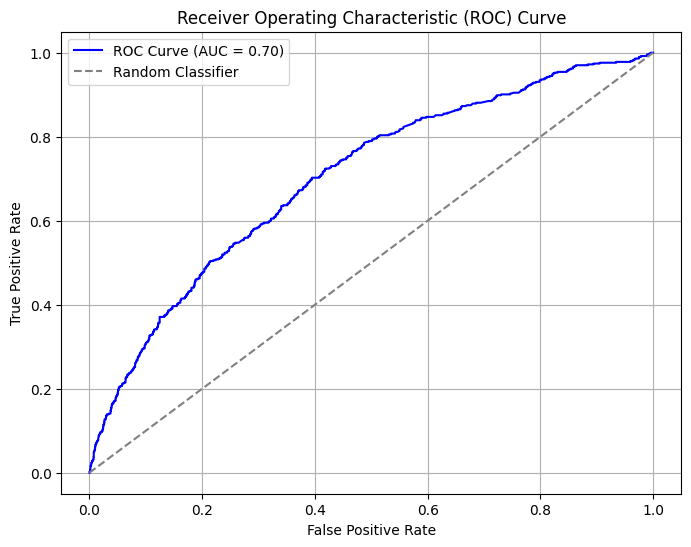

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score


# ROC Curve and AUC Score
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Classifier")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

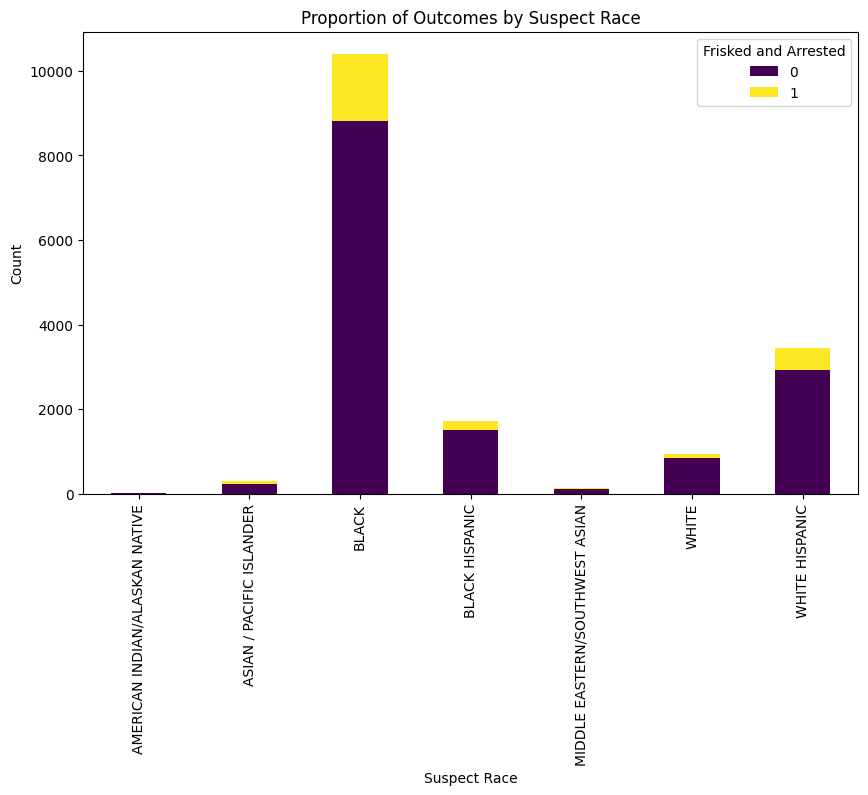

In [4]:
# Combine one-hot encoded race columns into a single column
race_columns = [
   'SUSPECT_RACE_DESCRIPTION_AMERICAN INDIAN/ALASKAN NATIVE',
   'SUSPECT_RACE_DESCRIPTION_ASIAN / PACIFIC ISLANDER',
   'SUSPECT_RACE_DESCRIPTION_BLACK',
   'SUSPECT_RACE_DESCRIPTION_BLACK HISPANIC',
   'SUSPECT_RACE_DESCRIPTION_MIDDLE EASTERN/SOUTHWEST ASIAN',
   'SUSPECT_RACE_DESCRIPTION_WHITE',
   'SUSPECT_RACE_DESCRIPTION_WHITE HISPANIC'
]


# Create a single column for race
df_cleaned['SUSPECT_RACE_DESCRIPTION'] = (
   df_cleaned[race_columns]
   .idxmax(axis=1)
   .str.replace('SUSPECT_RACE_DESCRIPTION_', '')
)


# Group and plot the outcomes by suspect race
race_outcome = df_cleaned.groupby(['SUSPECT_RACE_DESCRIPTION', 'FRISKED_AND_ARRESTED']).size().unstack()
race_outcome.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Proportion of Outcomes by Suspect Race")
plt.xlabel("Suspect Race")
plt.ylabel("Count")
plt.legend(title="Frisked and Arrested")
plt.show()